<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [1]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

    100% |████████████████████████████████| 1.5MB 5.8MB/s 
  Stored in directory: /Users/ljohnson/Library/Caches/pip/wheels/41/c8/31/48ace4468e236e0e8435f30d33e43df48594e4d53e367cf061
Successfully built nltk
  Found existing installation: nltk 3.4
    Uninstalling nltk-3.4:
      Successfully uninstalled nltk-3.4


[nltk_data] Downloading package punkt to /Users/ljohnson/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ljohnson/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 2) Use Spacy to tokenize / clean the listings 

In [52]:
df = pd.read_csv('job_listings.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [53]:
# function to remove html tags
def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [54]:
df['description'] = df['description'].apply(remove_html_tags)
df['description'].head()

0    b"Job Requirements:\nConceptual understanding ...
1    b'Job Description\n\nAs a Data Scientist 1, yo...
2    b'As a Data Scientist you will be working on c...
3    b'$4,969 - $6,756 a monthContractUnder the gen...
4    b'Location: USA \xe2\x80\x93 multiple location...
Name: description, dtype: object

In [55]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [56]:
# Tokenizer Pipe

tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
df['tokens'] = tokens
df['tokens'].head(5)

0    [b"job, requirements:\nconceptual, understandi...
1    [b'job, description\n\nas, data, scientist, 1,...
2    [b'as, data, scientist, working, consulting, b...
3    [b'$4,969, $6,756, monthcontractunder, general...
4    [b'location:, usa, \xe2\x80\x93, multiple, loc...
Name: tokens, dtype: object

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [79]:
docs = list(df['tokens'])
docs[:1]

[['b"job',
  'requirements:\\nconceptual',
  'understanding',
  'machine',
  'learning',
  'models',
  'like',
  'nai\\xc2\\xa8ve',
  'bayes,',
  'k-means,',
  'svm,',
  'apriori,',
  'linear/',
  'logistic',
  'regression,',
  'neural,',
  'random',
  'forests,',
  'decision',
  'trees,',
  'k-nn',
  'hands-on',
  'experience',
  '2',
  'them\\nintermediate',
  'expert',
  'level',
  'coding',
  'skills',
  'python/r.',
  '(ability',
  'write',
  'functions,',
  'clean',
  'efficient',
  'data',
  'manipulation',
  'mandatory',
  'role)\\nexposure',
  'packages',
  'like',
  'numpy,',
  'scipy,',
  'pandas,',
  'matplotlib',
  'etc',
  'python',
  'ggplot2,',
  'dplyr,',
  'tidyr',
  'r\\nability',
  'communicate',
  'model',
  'findings',
  'technical',
  'non-technical',
  'stake',
  'holders\\nhands',
  'experience',
  'sql/hive',
  'similar',
  'programming',
  'language\\nmust',
  'past',
  'work',
  'github,',
  'kaggle',
  'published',
  "article\\nmaster's",
  'degree',
  'sta

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer(stop_words='english', tokenizer=lambda doc: doc, lowercase=False)
c_vect.fit(docs)
c_vect.vocabulary_
dtm = c_vect.transform(docs)

/Users/ljohnson/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [81]:
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [86]:
dtm = pd.DataFrame(dtm, columns = c_vect.get_feature_names())
dtm.head()

,"""ability","""apply""","""best","""big","""can","""can-do""","""completeness","""customer","""engineering","""fintech""",...,zillow,zillow\'s,zones\nability,zoom,zuckerberg,zurich,|,||,~$70,~4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Visualize the most common word counts

In [95]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [96]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
2,data,419,3751,1.0,0.029882,0.029882,0.983568
189,business,303,1008,2.0,0.008030,0.037912,0.711268
53,experience,357,941,3.0,0.007496,0.045409,0.838028
60,work,326,876,4.0,0.006979,0.052388,0.765258
313,team,314,726,5.0,0.005784,0.058171,0.737089


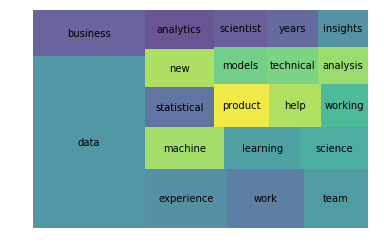

In [97]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, tokenizer=lambda doc: doc, lowercase=False)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(docs)

# View Feature Matrix as DataFrame
docs_df = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
docs_df.head()

,"""best","""success""",&amp;,(5),(a/b,(an,(and,(anticipated,(applies,(aws),...,you\xe2\x80\x99ll,you\xe2\x80\x99re,you\xe2\x80\x99ve,young,yrs,zf,zf\xe2\x80\x99s,zillow,|,||
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.03497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 # 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [89]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [90]:
ideal_job = ["A data scientist who has a knack for seeing patterns in data and creating visualizations to communicate this to others. A problem solver who will go to any length to come up with a solution. Someone who can clean, organize, and manipulate data. Strong python stack skills, SQL, Spark, AWS, Postgress a bonus"]

In [91]:
new = tfidf.transform(ideal_job)

nn.kneighbors(new.todense())

(array([[1.29606024, 1.35822355, 1.37848106, 1.38189046, 1.38527286]]),
 array([[390,  79,  19, 411, 384]]))

In [92]:
docs[390]

["b'must",
 'skills:',
 'python',
 'r',
 'machine',
 'learning',
 'statistics(linear',
 'models)',
 'restful',
 'services',
 'sql',
 'background',
 'banking/financial',
 'sector,aws,',
 'restful',
 'api',
 'design\\n\\nlocation',
 'ny\\neducation:\\nbachelor\\xe2\\x80\\x99s',
 'degree',
 'computer',
 'science',
 'related',
 'engineering',
 'discipline',
 'equivalent.\\njob',
 'responsibilities:',
 ':\\nresearch,',
 'identify',
 'assess',
 'value',
 'data',
 'sources',
 'products',
 'available',
 'market\\ndesign',
 'implement',
 'suitable',
 'data',
 'collection',
 'mechanisms',
 'gather',
 'data',
 'sources',
 'real',
 'time',
 'batches\\nintegrate',
 'collected',
 'data',
 'sources',
 'existing',
 'new',
 'data',
 'models\\nassist',
 'design,',
 'build,',
 'test',
 'optimization',
 'predictive',
 'models',
 'machine',
 'learning',
 'algorithms\\ndesign,',
 'build',
 'implement',
 'restful',
 'apis',
 'interface',
 'data',
 'models\\nmonitor,',
 'quality',
 'check',
 'report',
 'perfo

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.